In [1]:
import numpy as np
from matplotlib import pyplot as plt
from lqfn.quantum_systems import NonRelativisticSingleParticle1D

Calculations of two correlators (propagator and cube propagator) for a harmonic oscillator using metropolis algorithm.
We have computed the propagator using several procedure: using a "pure" metropolis, with the bootstrap procedure and with the binning procedure.

In [2]:
E_0 = 0.5
E_1 = 1.5
m = 1
omega_0 = 1

In [54]:
N=20
a=0.5
eps=1.4
N_cor=50
N_cfs=[25, 100, 1000, 10000]
N_copies = 20

In [4]:
t = np.arange(N-1) * a
E_exact = a*(E_1-E_0) #expected energy

In [5]:
def S_per_timeslice(j,x): # harm. osc. S
    jp = (j+1)%N # next site
    jm = (j-1+N)%N # previous site
    return a*x[j]**2/2 + x[j]*(x[j]-x[jp]-x[jm])/a

In [6]:
harmonic_oscillator = NonRelativisticSingleParticle1D(T=a*N, N=N, S_per_timeslice=S_per_timeslice)

In [7]:
def compute_G(x,n):
    g = 0
    for j in range(0,N):        
        g = g + x[j]*x[(j+n)%N]
    return g/N

In [8]:
def plot_delta_E(exact: float, data: np.ndarray, error: np.ndarray, title: str, n: int=None):
    assert data.shape == error.shape
    assert len(data.shape) == 1
    N = data.shape[0]
    assert n is None or (n <= N and n > 0)
    if n is None:
        n = N
    t = a*np.arange(n)
    fig, ax = plt.subplots()
    ax.plot(t, exact*np.ones(n), color='blue', label='Expectation')
    ax.errorbar(t, data[:n], yerr=error[:n], fmt='.', color='black', label='Numerical')
    ax.set_title(title)
    ax.set_xlabel('t')
    ax.set_ylabel(r'$\Delta E(t)$')
    ax.legend()
    return fig

---
---

Calculation of $\Delta E$ for the correlation function 
$$
    G(t) = \frac{1}{N} \sum_j \langle x(t_j+t)x(t_j) \rangle
$$
for a one dimensional harmonic oscillator.
The errors are computed using error propagation.

In [11]:
delta_Es = []
error_delta_Es = []
for N_cf in N_cfs:
    delta_E, error_delta_E = harmonic_oscillator.compute_delta_E(compute_G, N_cf, N_cor, eps)
    delta_Es.append(delta_E)
    error_delta_Es.append(error_delta_E)

C:\Users\damia\AppData\Local\Temp\ipykernel_16260\3077211406.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


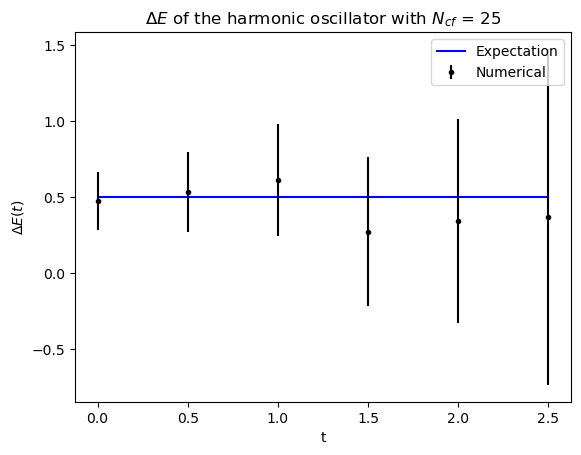

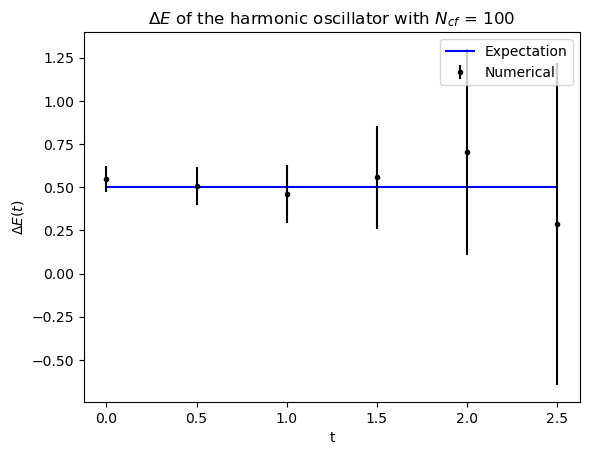

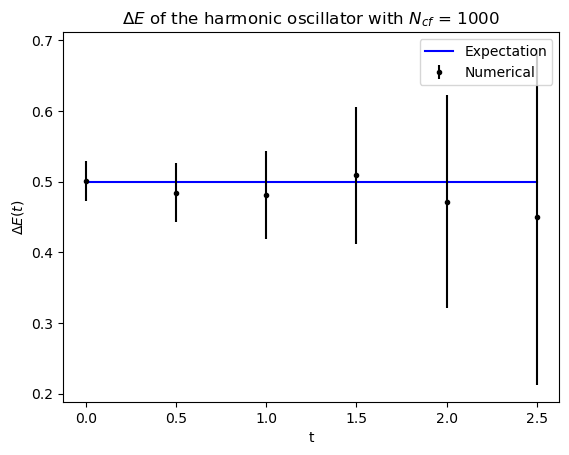

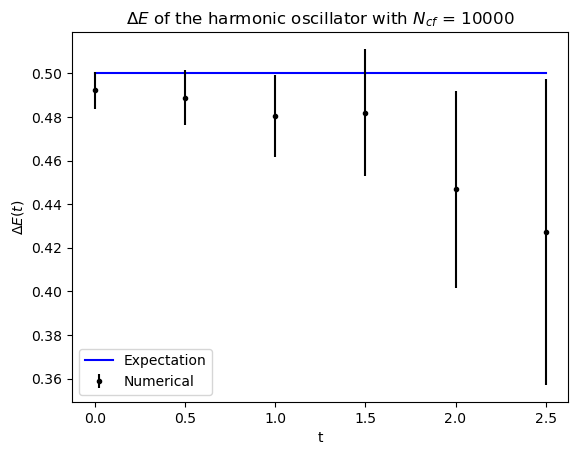

In [12]:
for i in range(len(delta_Es)):
    fig = plot_delta_E(E_exact, delta_Es[i], error_delta_Es[i], f'$\Delta E$ of the harmonic oscillator with $N_{{cf}}$ = {N_cfs[i]}', n=6)
    fig.show()

---
---

Calculation of $\Delta E$ for the correlation function 
$$
    G_{cube}(t) = \frac{1}{N} \sum_j \langle x^3(t_j+t)x^3(t_j) \rangle
$$
for a one dimensional harmonic oscillator. The errors are computed using error propagation.

In [13]:
def compute_G_cube(x,n):
    g = 0
    for j in range(0,N):        
        g = g + (x[j]*x[(j+n)%N])**3
    return g/N

In [14]:
delta_Es = []
error_delta_Es = []
for N_cf in N_cfs:
    delta_E, error_delta_E = harmonic_oscillator.compute_delta_E(compute_G_cube, N_cf, N_cor, eps)
    delta_Es.append(delta_E)
    error_delta_Es.append(error_delta_E)

C:\Users\damia\AppData\Local\Temp\ipykernel_16260\3077211406.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


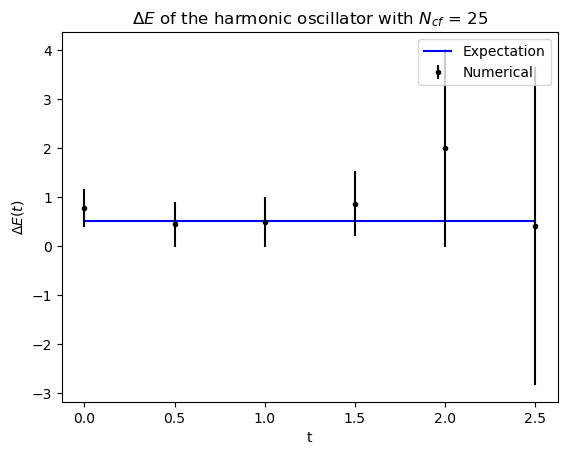

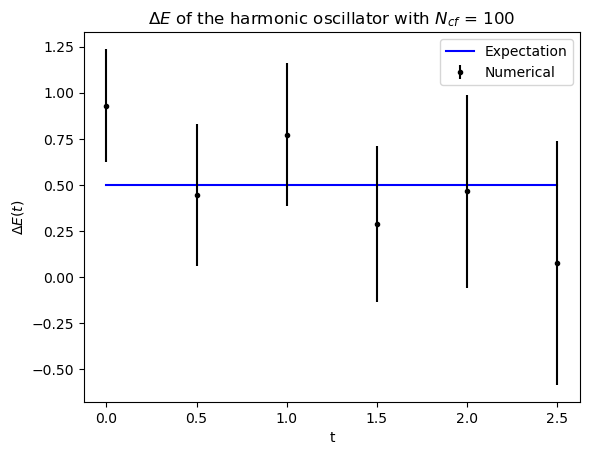

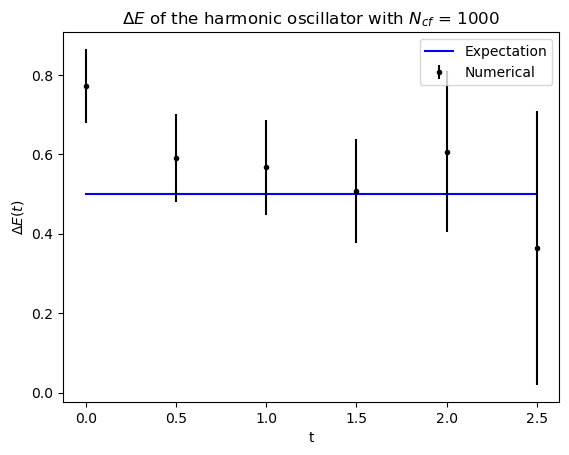

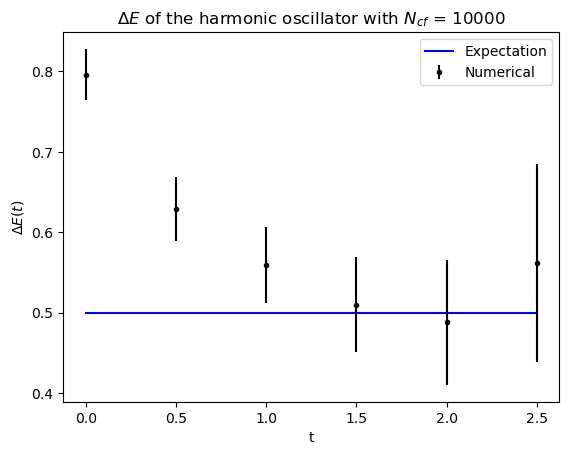

In [15]:
for i in range(len(delta_Es)):
    fig = plot_delta_E(E_exact, delta_Es[i], error_delta_Es[i], f'$\Delta E$ for $G_{{cube}}$ with $N_{{cf}}$ = {N_cfs[i]}', n=6)
    fig.show()

---
---

Calculation of $\Delta E$ for the correlation function 
$$
    G(t) = \frac{1}{N} \sum_j \langle x(t_j+t)x(t_j) \rangle
$$
for a one dimensional harmonic oscillator. The errors are computed using bootstrap procedure.

In [16]:
N_copies = 20

In [61]:
average_delta_E_with_bootstrap, std_delta_E_with_boostrap = harmonic_oscillator.compute_delta_E(compute_G, N_cf=10000, N_cor=N_cor, eps=eps, N_copies=N_copies)

C:\Users\damia\AppData\Local\Temp\ipykernel_18620\1176991445.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


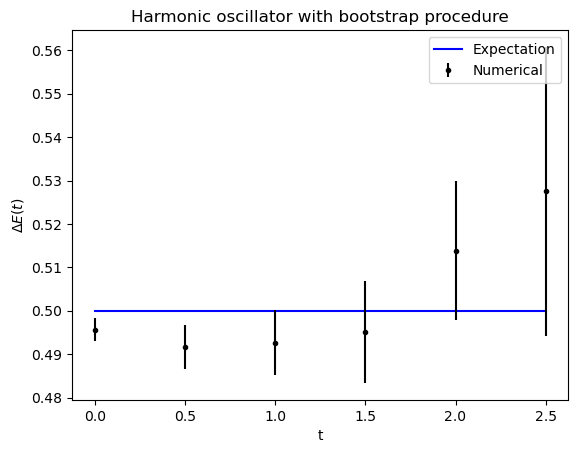

In [62]:
fig = plot_delta_E(E_exact, average_delta_E_with_bootstrap, std_delta_E_with_boostrap, 'Harmonic oscillator with bootstrap procedure', n=6)
fig.show()

We observe that G is close to zero for $t = \frac{Na}{2} $, hence the error associated to G is higher in this region due to the error propagation formula.
We also see the same behaviour using the bootstrap procedure.

---
---

Running of the metropolis simulation using $N_{cor}$=1.

In [19]:
average_delta_E, std_delta_E = harmonic_oscillator.compute_delta_E(compute_G, N_cf=5000, N_cor=1, eps=eps, N_copies=N_copies)

C:\Users\damia\AppData\Local\Temp\ipykernel_16260\2976926249.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


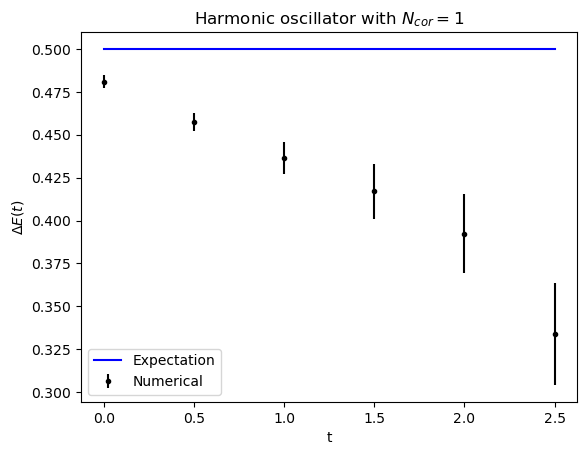

In [20]:
fig = plot_delta_E(E_exact, average_delta_E, std_delta_E, 'Harmonic oscillator with $N_{cor} = 1$', n=6)
fig.show()

The errors are unrelaible as expected

Binning procedure 

In [21]:
avg_binning, std_binning = harmonic_oscillator.compute_delta_E(compute_G, N_cf=5000, N_cor=1, eps=eps, N_copies=N_copies, bin_size=20)

C:\Users\damia\AppData\Local\Temp\ipykernel_16260\595668040.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


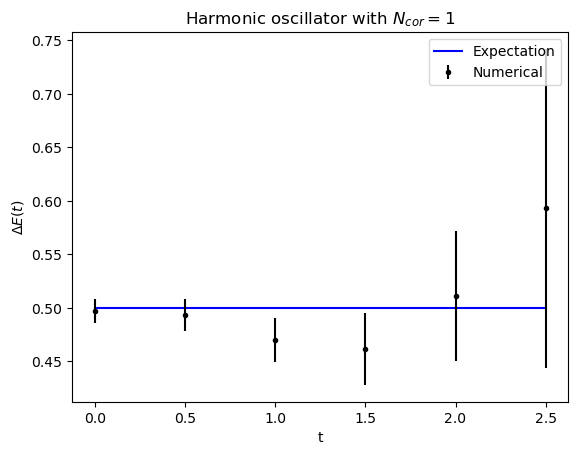

In [22]:
fig = plot_delta_E(E_exact, avg_binning, std_binning, 'Harmonic oscillator with $N_{cor} = 1$ and binning', n=6)
fig.show()

---
---

Harmonic oscillator with improved action

The new action is 
$$
    S_{imp}[x] = \sum_{j=0}^{N-1} a  \left(-\frac{1}{2}x_j \left(\Delta^{(2)} -a^2 \frac{(\Delta^{(2)})^2}{12} -1 \right)x_j \right)
$$
where $\Delta^{(2)}$ is the discretize second derivative. meaning that
$$
    \Delta^{(2)} x_j = \frac{x_{j+1}-2x_j+x_{j+1}}{a^2}
$$

In [63]:
def S_per_timeslice_improved(j,x): # harm. osc. S
    jpp = (j+2)%N
    jp = (j+1)%N
    jm = (j-1+N)%N
    jmm = (j-2+N)%N
    Sj = -0.5*x[j]*(2*x[jp] - 2*x[j] + 2*x[jm] - (2*x[jpp] - 8*x[jp] + 6*x[j] - 8*x[jm] + 2*x[jmm])/12)/a + a*0.5*x[j]**2
    return Sj

In [64]:
harmonic_oscillator_improved = NonRelativisticSingleParticle1D(T=a*N, N=N, S_per_timeslice=S_per_timeslice_improved)

In [65]:
average_delta_E_improved, std_delta_E_improved = harmonic_oscillator_improved.compute_delta_E(compute_G, N_cf=10000, N_cor=N_cor, eps=eps, N_copies=N_copies)

C:\Users\damia\AppData\Local\Temp\ipykernel_18620\4136183994.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


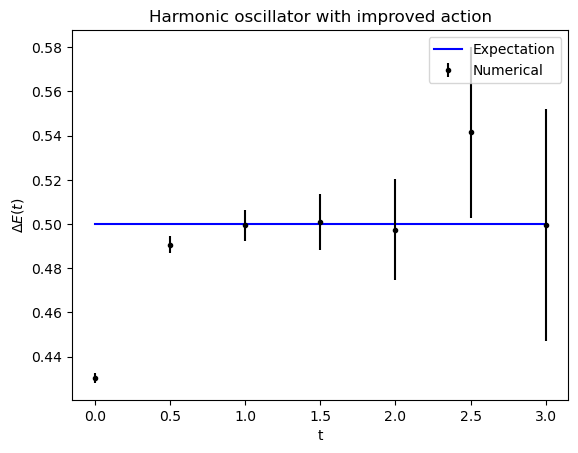

In [66]:
fig = plot_delta_E(E_exact, average_delta_E_improved, std_delta_E_improved, 'Harmonic oscillator with improved action', n=7)
fig.show()

The asymptotic value is approached from below, as expected from the existance of ghost states with negative norm.

---
---

Change variables to remove numerical ghosts, and recompute the action

In [67]:
def S_per_timeslice_redef(j, x):
    jp = (j+1)%N
    jm = (j-1+N)%N
    return a*(-1/2*m*x[j]*(2*x[jm] + 2*x[jp] - 2*x[j])/a**2 + 1/2*m*omega_0**2*x[j]**2*(1+(a*omega_0)**2/12))

In [68]:
harmonic_oscillator_imp_redef = NonRelativisticSingleParticle1D(T=a*N, N=N, S_per_timeslice=S_per_timeslice_redef)

In [69]:
avg_delta_E_redef, err_delta_E_redef = harmonic_oscillator_imp_redef.compute_delta_E(compute_G, N_cf=10000, N_cor=N_cor, eps=eps, N_copies=N_copies)

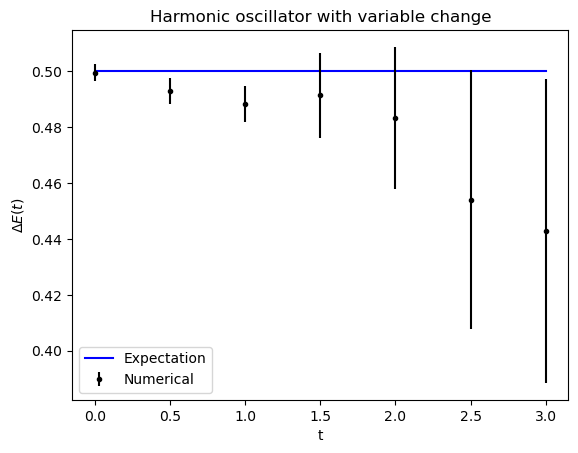

In [70]:
fig = plot_delta_E(E_exact, avg_delta_E_redef, err_delta_E_redef, "Harmonic oscillator with variable change", n=7)